In [13]:
# ヒストグラム均等化 
# 
# 画像処理特論
# 
# 村松 正吾 
# 
# 動作確認: Python 3.7, PyTorch 1.8

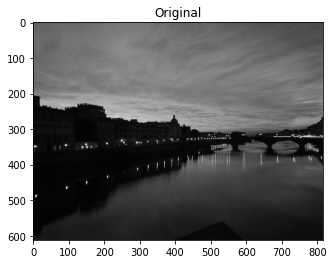

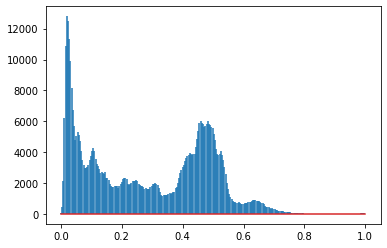

In [14]:
# Histogram equalization
# 
# Advanced Topics in Image Processing
# 
# Shogo MURAMATSU
# 
# Verified: Python 3.7, PyTorch 1.8
from PIL import Image, ImageOps
import requests
import torch
import torchvision
from matplotlib import pyplot as plt
im2double = torchvision.transforms.ConvertImageDtype(torch.double)
rgb2gray = torchvision.transforms.Grayscale()
totensor = torchvision.transforms.ToTensor()
topilimg = torchvision.transforms.ToPILImage()
locs = torch.linspace(0,1,256).numpy()
imhist = lambda x: plt.stem(locs,torch.histc(x,bins=256,min=0.,max=1.),markerfmt='None',use_line_collection=True)

# サンプル画像の準備
# (Preparation of sample image)
# 
# 本サンプルで利用する画像データを収めたdata フォルダにパスをとおす。
# 
# Create a path to the data folder that contains images used in this sample.

# Reading original image
#I = im2double(rgb2gray(totensor(Image.open('./data/firenzeRgb.jpg'))))
url = 'https://github.com/msiplab/AtipWork/raw/master/data/firenzeRgb.jpg'
I = im2double(rgb2gray(totensor(Image.open(requests.get(url, stream=True).raw))))

plt.figure(1)
plt.imshow(topilimg(I),cmap='gray')
plt.title('Original')
plt.show()
plt.figure(2)
imhist(I)
plt.show()


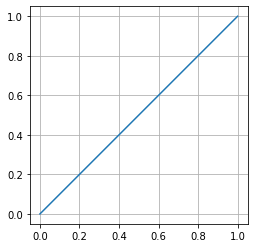

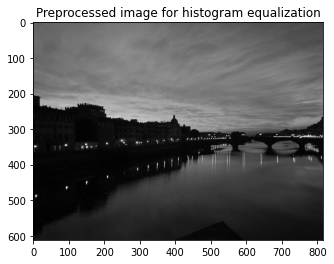

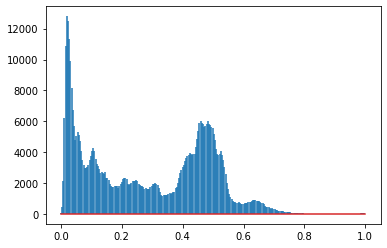

In [15]:
# (Process before histogram equalization)
# 
# $$v=T_1(x)= x^\gamma $$
# 
# $$y=T_2(v)= \frac{1}{2}(\mathrm{sign}(2v-1)|2v-1|^{10^{-\alpha}}+1)$$

# Definition of process
gamma = 1.0
alpha = 0.0
T1 = lambda x: torch.pow(x,gamma)
T2 = lambda v: 0.5*(torch.sign(2.0*v-1.0)*(torch.pow(torch.abs(2.0*v-1.0),10**(-alpha)))+1.0)
Tp = lambda x: T2(T1(x))
plt.figure(3)
plt.plot(locs,Tp(torch.tensor(locs)).detach().numpy())
plt.axis('square')
plt.grid()
plt.show()
# Preprocessing for histogram equalization
J = Tp(I)
plt.figure(4)
plt.imshow(topilimg(J),cmap='gray')
plt.title('Preprocessed image for histogram equalization')
plt.show()
plt.figure(5)
imhist(J)
plt.show()

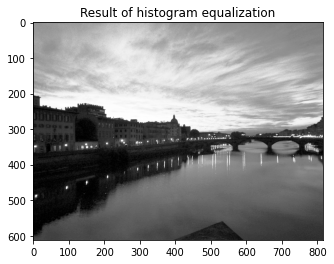

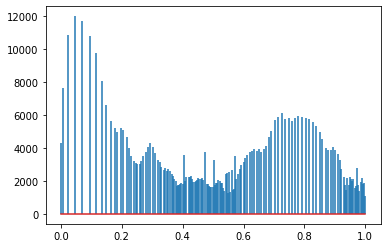

In [16]:
# (Histgram equalization)

# Power law conversion with IMADUST function
K = totensor(ImageOps.equalize(topilimg(J)))
plt.figure(6)
plt.imshow(topilimg(K),cmap='gray')
plt.title('Result of histogram equalization')
plt.show()
plt.figure(7)
imhist(K)
plt.show()

In [17]:
# © Copyright, Shogo MURAMATSU, All rights reserved.